# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Solving-an-equation,-numerically-or-with-the-Lambert-W-function" data-toc-modified-id="Solving-an-equation,-numerically-or-with-the-Lambert-W-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Solving an equation, numerically or with the Lambert W function</a></div><div class="lev2 toc-item"><a href="#Loading-packages-and-configuring-plot-sizes" data-toc-modified-id="Loading-packages-and-configuring-plot-sizes-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading packages and configuring plot sizes</a></div><div class="lev2 toc-item"><a href="#Plotting-the-function-first" data-toc-modified-id="Plotting-the-function-first-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting the function first</a></div><div class="lev2 toc-item"><a href="#Solving-numerically?" data-toc-modified-id="Solving-numerically?-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving numerically?</a></div><div class="lev2 toc-item"><a href="#How-many-solutions-for-a-given-a-?" data-toc-modified-id="How-many-solutions-for-a-given-a-?-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How many solutions for a given a ?</a></div><div class="lev2 toc-item"><a href="#Number-of-solutions-as-function-of-a" data-toc-modified-id="Number-of-solutions-as-function-of-a-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Number of solutions as function of a</a></div><div class="lev2 toc-item"><a href="#Plot-of-solution(s)-as-function-of-a" data-toc-modified-id="Plot-of-solution(s)-as-function-of-a-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plot of solution(s) as function of a</a></div><div class="lev2 toc-item"><a href="#Solving-formally-with-the-Lambert-W-function" data-toc-modified-id="Solving-formally-with-the-Lambert-W-function-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Solving formally with the Lambert W function</a></div><div class="lev2 toc-item"><a href="#Asymptotic-behaviors-and-approximations" data-toc-modified-id="Asymptotic-behaviors-and-approximations-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Asymptotic behaviors and approximations</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Conclusion</a></div>

# Solving an equation, numerically or with the Lambert W function

I want to solve the equation $\exp(-ax^2)=x$ and find its solution(s) as a function of $a\in\mathbb{R}$.

## Loading packages and configuring plot sizes

In [1]:
%load_ext watermark
%watermark -a "Lilian Besson (Naereen)" -i -v -p numpy,matplotlib,scipy,seaborn

Lilian Besson (Naereen) 2018-01-31T14:56:14+01:00

CPython 3.6.3
IPython 6.2.1

numpy 1.14.0
matplotlib 2.1.2
scipy 1.0.0
seaborn 0.8.1


In [2]:
import numpy as np
from scipy import optimize as opt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.8)

## Plotting the function first

In [3]:
def objective(x, a):
    return np.exp(- a * x**2) - x

First, let's have a look to its plot for some values of $a$:

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

Text(0.5,1,'Function $\\exp(- a x^2) - x$ for different $a$')

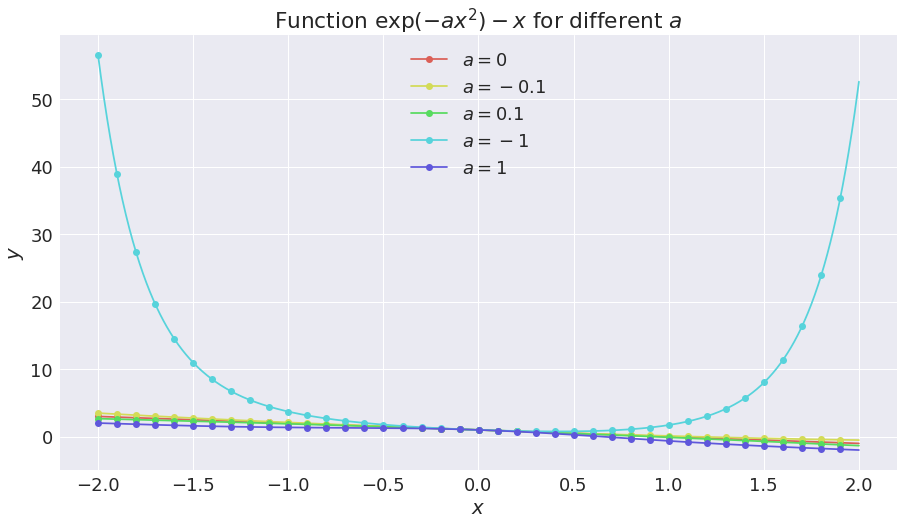

In [4]:
X = np.linspace(-2, 2, 2000)
for a in [0, -0.1, 0.1, -1, 1]:
    plt.plot(X, objective(X, a), 'o-', label=f"$a={a:.3g}$", markevery=50)
plt.legend()
plt.xlabel("$x$"); plt.ylabel("$y$")
plt.title(r"Function $\exp(- a x^2) - x$ for different $a$")
plt.show()

We can see that a solution to $\exp(-a x^2) = x$ has to be positive, as $\exp(-a x^2) > 0$ for any $x,a$.
We also check that if $a < 0$, $\exp(-a x^2) - x$ seems to always be positive, but if $a \geq 0$, it seems to have a unique root.
Let's zoom a little bit:

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

Text(0.5,1,'Function $\\exp(- a x^2) - x$ for different $a$')

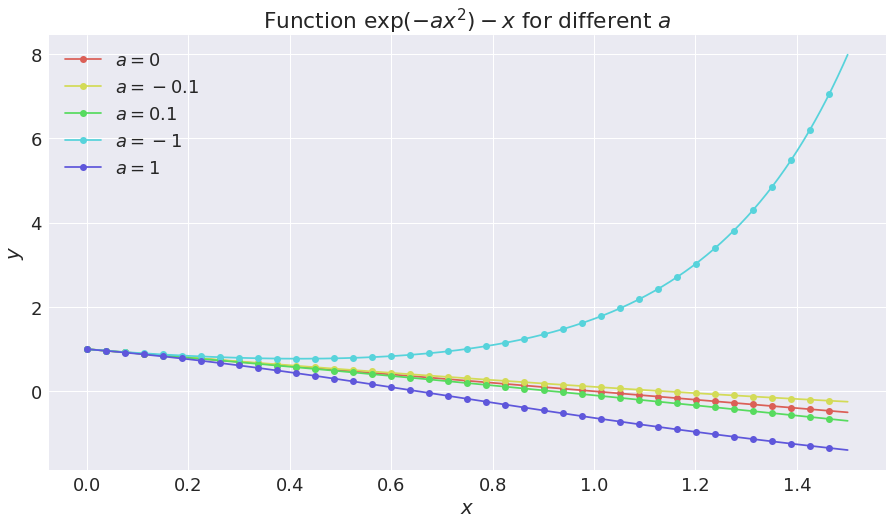

In [5]:
X = np.linspace(0, 1.5, 2000)
for a in [0, -0.1, 0.1, -1, 1]:
    plt.plot(X, objective(X, a), 'o-', label=f"$a={a:.3g}$", markevery=50)
plt.legend()
plt.xlabel("$x$"); plt.ylabel("$y$")
plt.title(r"Function $\exp(- a x^2) - x$ for different $a$")
plt.show()

The curve for $a=-0.1$ seems to stay negative, but that's not possible as for $a<0$ and $x\to\infty$, $\exp(-a x^2)$ dominates over $-x$.
We can check that it will have a second root:

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

Text(0.5,1,'Function $\\exp(- a x^2) - x$ for different $a$')

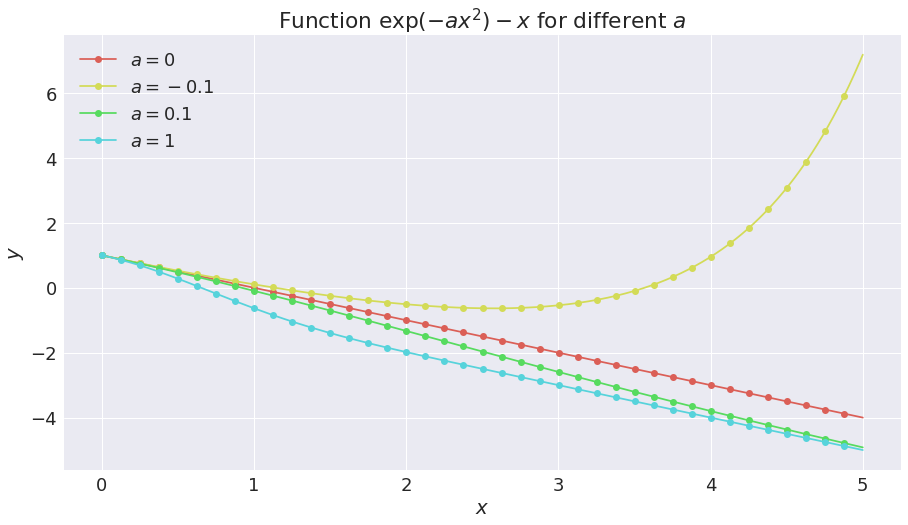

In [6]:
X = np.linspace(0, 5, 2000)
for a in [0, -0.1, 0.1, 1]:
    plt.plot(X, objective(X, a), 'o-', label=f"$a={a:.3g}$", markevery=50)
plt.legend()
plt.xlabel("$x$"); plt.ylabel("$y$")
plt.title(r"Function $\exp(- a x^2) - x$ for different $a$")
plt.show()

## Solving numerically?

We can start to try to use [`scipy.optimize.root`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root) to numerically solve this equation.

In [7]:
def one_solution(a, x0=0, verb=False):
    sol = opt.root(objective, x0, args=(a,))
    if verb: print(sol)
    if sol.success:
        return sol.x
    else:
        raise ValueError(f"No solution was found for a = {a:.3g} (and starting at x0 = {x0:.3g}).")

Let's check that there is no solution for $a < 0$ too small.

In [8]:
one_solution(-1, verb=True)

    fjac: array([[-1.]])
     fun: array([0.77291476])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 28
     qtf: array([-0.77291498])
       r: array([-0.00495227])
  status: 5
 success: False
       x: array([0.41894532])


ValueError: No solution was found for a = -1 (and starting at x0 = 0).

It can find a solution, but only one (depending on the starting point $x_0$) and not both:

In [9]:
one_solution(-0.1, x0=0, verb=True)

    fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.57868385e-10])
       r: array([0.7408292])
  status: 1
 success: True
       x: array([1.13835649])


array([1.13835649])

In [10]:
one_solution(-0.1, x0=10, verb=True)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 23
     qtf: array([-2.18643326e-10])
       r: array([-1.54264248])
  status: 1
 success: True
       x: array([3.56555841])


array([3.56555841])

For $a > 0$, the equation seems to have a unique solution:

In [11]:
one_solution(1, x0=0)
one_solution(1, x0=-100)
one_solution(1, x0=100)

array([0.65291864])

array([0.65291864])

array([0.65291864])

We can just hack and try different values for $x_0$, expecting to find all the roots.

In [12]:
def solutions(a, x0s=None, tol=1e-10, verb=False):
    nbdigits = int(np.log10(1. / tol))
    sols = set()
    if x0s is None:
        x0s = [-10, -5, -2, -1, 0, 1, 2, 5, 10]
    for x0 in x0s:
        sol = opt.root(objective, x0, args=(a,))
        if sol.success:
            approx = np.round(float(sol.x), nbdigits)
            sols.add(approx)
    if verb and len(sols) == 0:
        print(f"No solution was found for a = {a:.3g} (and starting at x0 = {x0:.3g}).")
    return sols

In [13]:
solutions(-10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


set()

In [14]:
solutions(-0.1)

{1.1383564947, 3.5655584119}

In [15]:
solutions(0)

{1.0}

In [16]:
solutions(1)

{0.6529186404}

In [17]:
solutions(2)

{0.5482170814}

## How many solutions for a given a ?
We can use this to try to find the threshold value for $a$ from $0$ to $2$ and from $2$ to $1$ solution:

In [18]:
def thresholds(amin=-10, amax=10, delta=0.01):
    gap_points = dict()
    prev_a = amin
    prev_nb_sol = len(solutions(prev_a))
    for a in np.arange(amin, amax, delta):
        nb_sol = len(solutions(a))
        if nb_sol != prev_nb_sol:
            gap_points[(prev_nb_sol, nb_sol)] = (prev_a, a)
            prev_nb_sol = nb_sol
        prev_a = a
    return gap_points

In [21]:
thresholds(amin=-10, amax=10, delta=0.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


{(0, 1): (-0.3700000000002053, -0.3600000000002055),
 (0, 2): (-0.1900000000002091, -0.18000000000020933),
 (1, 0): (-0.3400000000002059, -0.33000000000020613),
 (2, 0): (-7.030000000000063, -7.0200000000000635),
 (2, 1): (-0.020000000000212736, -0.01000000000021295),
 (2, 3): (-0.0500000000002121, -0.04000000000021231),
 (3, 2): (-0.04000000000021231, -0.030000000000212523)}

In [22]:
thresholds(amin=-8, amax=1, delta=0.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


{(0, 1): (-0.37000000000016264, -0.36000000000016286),
 (0, 2): (-0.19000000000016648, -0.1800000000001667),
 (1, 0): (-0.3400000000001633, -0.3300000000001635),
 (2, 0): (-7.030000000000021, -7.020000000000021),
 (2, 1): (-0.020000000000170104, -0.010000000000170317),
 (2, 3): (-0.050000000000169464, -0.04000000000016968),
 (3, 2): (-0.04000000000016968, -0.03000000000016989)}

I think having $3$ (or more) solutions is a numerical error.

In [23]:
amin = -100
amax = 100
gap_points = thresholds(amin=amin, amax=amax, delta=0.1)
gap_points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


{(0, 2): (-0.20000000000567297, -0.10000000000567866),
 (2, 0): (-28.20000000000408, -28.100000000004087),
 (2, 1): (-0.10000000000567866, -5.6843418860808015e-12)}

As we will see below, even having two solutions is nothing but a numerical error.

## Number of solutions as function of a
We can plot the (estimated) number of solution as a function of $a$, to start wit, thanks to the [`matplotlib.pyplot.hlines`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hlines) function:

{0, 1, 2}
{0: [-0.20000000000567297], 2: [-28.20000000000408, -0.10000000000567866]}
{2: [-0.10000000000567866], 0: [-28.100000000004087], 1: [-5.6843418860808015e-12]}


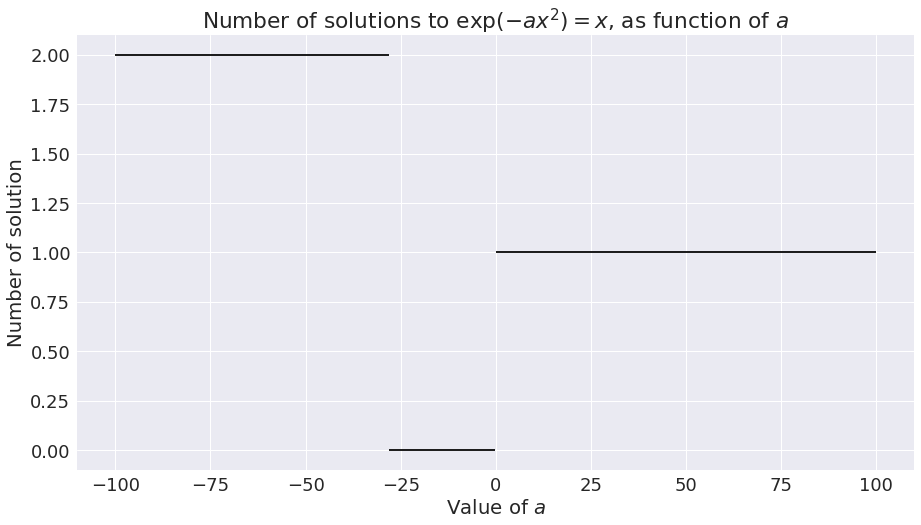

In [24]:
def plot_gap_points(gap_points, amin, amax):
    ys = set()
    for ym, yM in gap_points.keys():
        ys.add(ym)
        ys.add(yM)
    print(ys)
    xleft = dict()
    xright = dict()
    for (ym, yM), (xm, xM) in gap_points.items():
        xleft[ym] = xleft.get(ym, []) + [xm]
        xright[yM] = xright.get(yM, []) + [xM]
    for ym, yM in gap_points.keys():
        xleft[ym].sort()
        xright[yM].sort()
    print(xleft)
    print(xright)
    min_xleft = min(sum(list(xleft.values()), []))
    max_xright = min(sum(list(xright.values()), []))
    plt.figure()
    for y in ys:
        if y not in xleft and y in xright:
            for x in xright[y]:
                plt.hlines(y, x, amax)
        if y in xleft and min_xleft in xleft[y]:
            plt.hlines(y, amin, min_xleft)
            del xleft[y][0]
        #if y in xright and max_xright in xright[y]:
        #    plt.hlines(y, max_xright, amax)
        #    del xright[y][-1]
        if y in xleft and y in xright:
            for xmin, xmax in zip(xleft[y], xright[y]):
                plt.hlines(y, xmin, xmax)
    plt.xlabel("Value of $a$")
    plt.ylabel("Number of solution")
    plt.title(r"Number of solutions to $\exp(- a x^2) = x$, as function of $a$")

    return ys, xleft, min_xleft, xright, max_xright

ys, xleft, min_xleft, xright, max_xright = plot_gap_points(gap_points, amin, amax)

## Plot of solution(s) as function of a
Now we can try to use this to plot the solution(s) as function of $a$.

In [25]:
def plot_multivalued_function(X, f, maxnboutput=1, **kwargs):
    Y = np.zeros((maxnboutput, len(X)))
    Y.fill(np.nan)
    for i, x in enumerate(X):
        ys = sorted(list(f(x)))
        for j, y in enumerate(ys):
            Y[j, i] = y
    for j in range(maxnboutput):
        plt.plot(X, Y[j], 'o-', **kwargs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


Text(0.5,0,'Parameter $a$')

Text(0,0.5,'Solution(s)')

Text(0.5,1,'Solution(s) to $\\exp(- a x^2) = x$, as function of $a$')

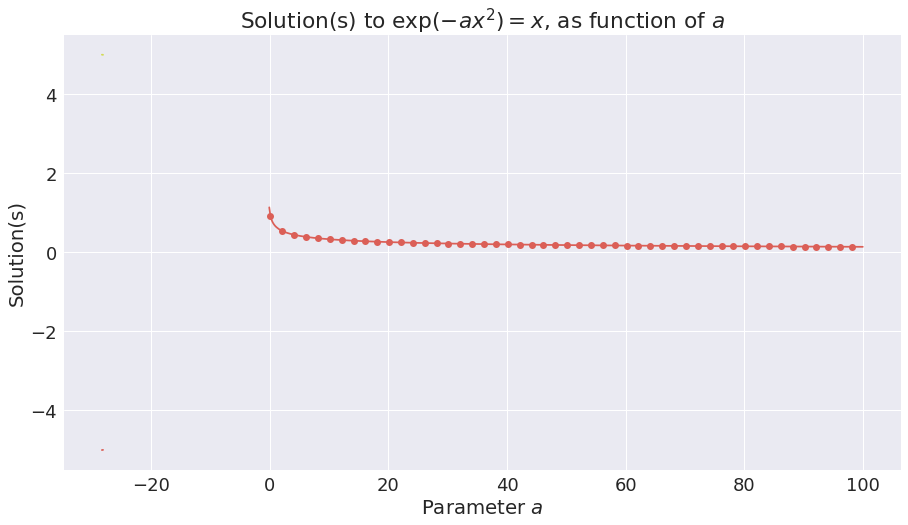

In [26]:
A = np.linspace(-100, 100, 1000)

plot_multivalued_function(A, solutions, maxnboutput=2, markevery=10)
plt.legend()
plt.xlabel("Parameter $a$"); plt.ylabel("Solution(s)")
plt.title(r"Solution(s) to $\exp(- a x^2) = x$, as function of $a$")
plt.show()

No handles with labels found to put in legend.


Text(0.5,0,'Parameter $a$')

Text(0,0.5,'Solution(s)')

Text(0.5,1,'Solution(s) to $\\exp(- a x^2) = x$, as function of $a$')

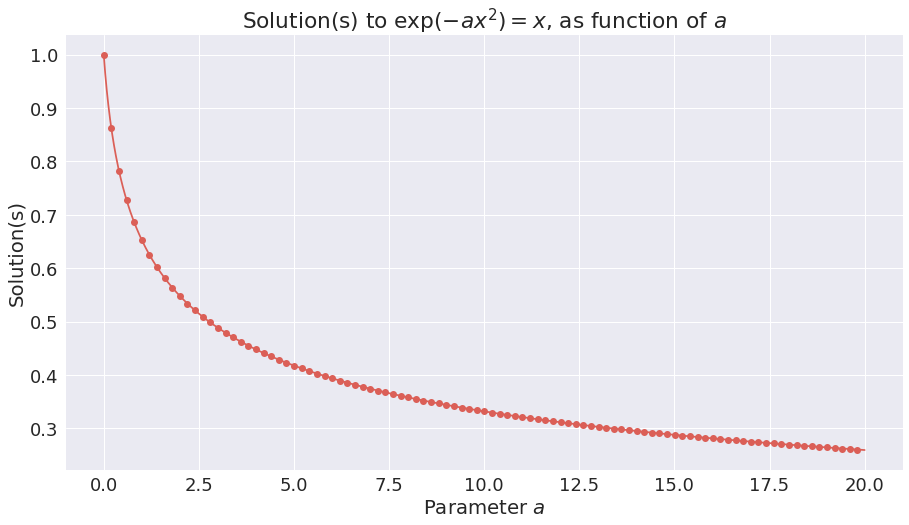

In [27]:
A = np.linspace(0, 20, 2000)

plot_multivalued_function(A, solutions, maxnboutput=2, markevery=20)
plt.legend()
plt.xlabel("Parameter $a$"); plt.ylabel("Solution(s)")
plt.title(r"Solution(s) to $\exp(- a x^2) = x$, as function of $a$")
plt.show()

This shows the numerical solution to the equation, and we will check below that the formal solution coincides.

## Solving formally with the Lambert W function

Luckily, we can transform this equation to solve it with the Lambert $W$ function, defined as $W(x) = z \Leftrightarrow x = z \mathrm{e}^{z}$.
For more details, [please see this page](https://en.wikipedia.org/wiki/Lambert_W_function), or [this article](https://cs.uwaterloo.ca/research/tr/1993/03/W.pdf).

As for (almost) all the special function, we don't need to write it ourself: it is in scipy! [`scipy.special.lambertw`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html#scipy.special.lambertw)

In [28]:
from scipy.special import lambertw

As the only possible solution are $x>0$
$$
\exp(-a x^2) = x \Leftrightarrow
\left(\exp(-a x^2)\right)^2= \exp(-2 a x^2) = x^2 \Leftrightarrow
2 a y \exp(2 a x) = 2 a \;\;(\text{with}\;\; y := x^2) \Leftrightarrow \\
u \exp(u) = 2 a \;\;(\text{with}\;\; u := 2 a y) \Leftrightarrow
u = W(2a) \Leftrightarrow
y = \frac{W(2a)}{2a} \Leftrightarrow
x(a) := \sqrt{\frac{W(2a)}{2a}}.
$$

And so it is quite easy to compute, for $a > 0$ (the behavior at $0$ is undefined without a more careful study):

In [30]:
def formal_solution(a):
    return np.sqrt(lambertw(2 * a) / (2 * a))

We can check some values:

In [35]:
for a in [0.5, 1, 2, 3, 4]:
    xa = formal_solution(a)
    assert np.isclose(exp(-a * xa**2), xa)
    print(f"a = {a:.3g} gives x(a) = {float(xa):.3g}")

a = 0.5 gives x(a) = 0.753
a = 1 gives x(a) = 0.653
a = 2 gives x(a) = 0.548
a = 3 gives x(a) = 0.489
a = 4 gives x(a) = 0.448


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


## Asymptotic behaviors and approximations

We can try to approximate the solution for small $a$ or large $a$:

- For small $a$, $W(2a) \simeq 2a - 4a^2$ so $x(a) \simeq 1 - a$.

- For large $a$, we have [this bound](https://en.wikipedia.org/wiki/Lambert_W_function#Asymptotic_expansions):
  $$ \forall x \geq \mathrm{e},{\displaystyle \ln(x)-\ln {\bigl (}\ln(x){\bigr )}+{\frac {\ln {\bigl (}\ln(x){\bigr )}}{2\ln(x)}}\leq W(x)\leq \ln(x)-\ln {\bigl (}\ln(x){\bigr )}+{\frac {e}{e-1}}{\frac {\ln {\bigl (}\ln(x){\bigr )}}{\ln(x)}}} $$

In [36]:
e = np.exp(1)

def upper_bound(a):
    up_b = np.log(2*a) - np.log(np.log(2*a)) + (e / (e - 1)) * (np.log(np.log(2*a)) / np.log(2*a))
    return np.sqrt(up_b / (2*a))

def lower_bound(a):
    lo_b = np.log(2*a) - np.log(np.log(2*a)) + np.log(np.log(2*a)) / (2 * np.log(2*a))
    return np.sqrt(lo_b / (2*a))

We can plot all this.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0,'Parameter $a$')

Text(0,0.5,'Solution $x(a) = \\sqrt{\\frac{W(2a)}{2a}}$')

Text(0.5,1,'Solution to $\\exp(- a x^2) = x$, as function of $a$')

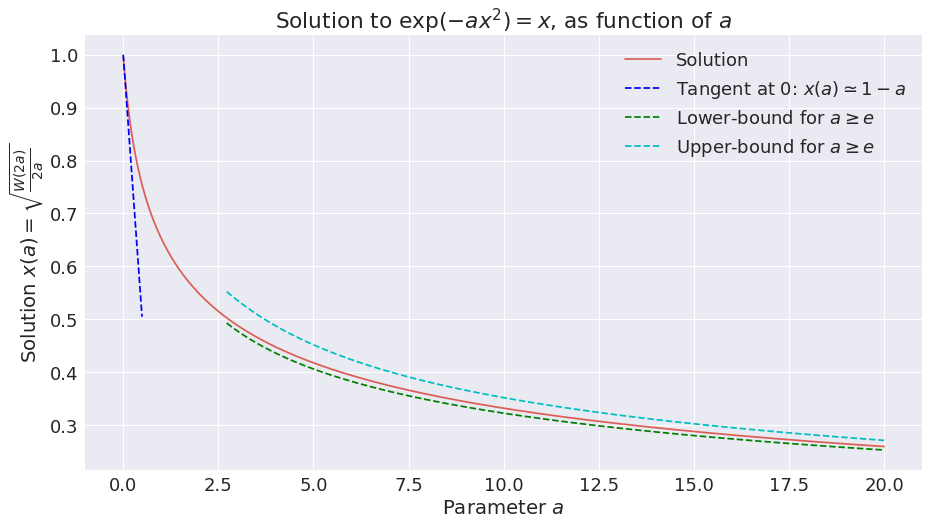

In [39]:
A = np.linspace(0, 20, 4000)
A1 = A[A <= 0.5]
A2 = A[A >= 1]
Ae = A[A >= e]

plt.plot(A, formal_solution(A), label="Solution", markevery=20)

plt.plot(A1, 1 - A1, 'b--', label=r"Tangent at $0$: $x(a) \simeq 1 - a$", markevery=20)

#plt.plot(A2, np.sqrt((np.log(2*A2) - np.log(np.log(2*A2)))/(2*A2)), 'g--', label=r"Asymptote at $+\infty$", markevery=20)
plt.plot(Ae, lower_bound(Ae), 'g--', label=r"Lower-bound for $a \geq e$", markevery=20)
plt.plot(Ae, upper_bound(Ae), 'c--', label=r"Upper-bound for $a \geq e$", markevery=20)

plt.legend()
plt.xlabel("Parameter $a$"); plt.ylabel(r"Solution $x(a) = \sqrt{\frac{W(2a)}{2a}}$")
plt.title(r"Solution to $\exp(- a x^2) = x$, as function of $a$")
plt.show()

And voilà.

## Conclusion

That's it for today, *folks*!

> See [here](https://github.com/Naereen/notebooks/) for other notebooks I wrote, in Python, Julia, OCaml or other languages.